In [5]:
import numpy as np
import tensorflow as tf
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import os
import csv

In [6]:
test_images = pd.read_csv(r"C:\Users\india\mnist digit recognition\test.csv")

In [7]:
print(test_images.shape)
test_images = np.array(test_images)
size = len(test_images)
# plt.imshow(test_images[0 , :].reshape((28,28)))

(28000, 784)


In [8]:
lis = []
with tf.Session() as sess:    
    
    #First let's load meta graph and restore weights
    saver = tf.train.import_meta_graph('/temp/model.ckpt-100.meta')
    saver.restore(sess,tf.train.latest_checkpoint('/temp/./'))
#     for v in tf.global_variables():
#         print(v.name)
    graph = sess.graph
    x  = graph.get_tensor_by_name('x:0')
    y  = graph.get_tensor_by_name('final_pred:0')
    drop_prob  = graph.get_tensor_by_name('drop_prob:0')
    for i in range(0 , size , 1 ):
        predictions = y.eval(feed_dict={ x: test_images[i,:].reshape((1,-1)) , drop_prob: 0.8})
        lis.append(predictions)
#     for v in tf.global_variables():
#         print(v.name)
#     output = sess.run(y_ ,feed_dict={ x: test_images , drop_prob: 0.8 })


INFO:tensorflow:Restoring parameters from /temp/model.ckpt-100


In [9]:
lis = np.array(lis)
print(np.array(lis).shape)

(28000, 1)


In [10]:
file = open('submission_mnist_cnn.csv' , "w")
writer = csv.writer(file)
writer.writerow(['ImageId','Label'])
for i in range(0 , size , 1):
    l = []
    l.append(str(i+1))
    l.append(str(lis[i][0]))
    writer.writerow(l)

file.close()

In [11]:
sdt = pd.read_csv('submission_mnist_cnn.csv')
print(sdt)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
5            6      7
6            7      0
7            8      3
8            9      0
9           10      3
10          11      5
11          12      7
12          13      4
13          14      0
14          15      4
15          16      3
16          17      3
17          18      1
18          19      9
19          20      0
20          21      9
21          22      1
22          23      1
23          24      5
24          25      7
25          26      4
26          27      2
27          28      7
28          29      4
29          30      7
...        ...    ...
27970    27971      5
27971    27972      0
27972    27973      4
27973    27974      8
27974    27975      0
27975    27976      3
27976    27977      6
27977    27978      0
27978    27979      1
27979    27980      9
27980    27981      3
27981    27982      1
27982    27983      1
27983    2

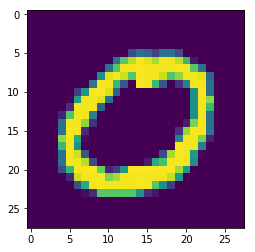

In [13]:
import matplotlib.pyplot as plt
plt.imshow(test_images[8 , :].reshape((28,28)))

In [14]:
loaded_graph = tf.Graph()
saver = tf.train.Saver()
with loaded_graph.as_default():
    
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph('/temp/model.ckpt-1.meta') 
        saver.restore(sess,tf.train.latest_checkpoint('/temp/'))
    #     saver.restore(sess , "/temp/model.ckpt-1")
        print("model restored")
        _accuracy = loaded_graph.get_tensor_by_name('accuracy:0')
        _x  = loaded_graph.get_tensor_by_name('x:0')
        _y  = loaded_graph.get_tensor_by_name('y_:0')


ValueError: No variables to save